### Identification Trees
So far, in the `knn.ipynb` we've classified -Republicans- and -Democrats- and understood how some 
votations are more relevant in these party-wise separation. Now, we aim to create a model that 
correctly describe which votes separate those two categories.

In this particular example, the tests a sample will find once it goes down the id tree will be something
like "Did you vote yes or not on this vote?" and "Did you vote no or not on this vote?" These two questions
are different since the legislator can abstain or be absent so it could happen that he/she actually didn't 
vote yes nor no.

* **Occam's razor**: The world is inherently simple so the best possible explanation is usually the simplest
    one. Applied to ID-Trees, the simplest (smaller) tree is usually the best one.
* **How do we build the smallest possible ID-Tree?**: Using tests that most efficiently transform an 
    inhomogeneous set of samples into an homogeneous one. *Disorder?*
* **Information theory**:
$$\mathcal{D}(test) = \sum_b (\frac{n_b}{n_t}) \times (\sum_c -\frac{n_{bc}}{n_b} \log_2 \frac{n_{bc}}{n_b})$$
where:
$$
\begin{split}
&n_b = \text{number of samples that reach a given test}\\
&n_{bc} = \text{number of samples that reach a given test and belong to class } c\\
&n_t = \text{total number of samples}
\end{split}
$$
Example $\mathcal{D}$ graph for a sample set with only 2 classes:

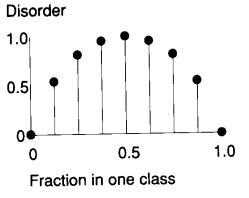

* **Sprouter Procedure**:
    1. Until each leaf node is populated by as homogeneous a sample set as possible:
        1. Select a leaf node with an inhomogeneous sample set.
        1. Replace that leaf node by a test node that divides the ingomogeneous sample
        set into minimally inhomogeneous subsets, accordint to some measure of disorder

* **Eliminating USELESS rules**:
    Can any of the atecedents be eliminated without changing what the rules does on the 
    samples?

* Have a look at Fisher's Exact Test

### Scikit-Learn
* **Gini Impurity**: Simple disorder measure, example for two classes classification
$$\mathcal{GI} = 1 - (\frac{n_p}{n_T})^2 - (\frac{n_n}{n_T})^2$$
where
$$
\begin{split}
&n_T = \text{number of samples that reach a given test}\\
&n_{p} = \text{number of positivie samples}\\
&n_{n} = \text{number of negative samples}
\end{split}
$$

## Heart Disease Identification
[UCI Machine Lerning Repository](https://archive.ics.uci.edu/)

[Heart disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


pd.set_option("display.precision", 2)

UCI import instructions:

In [15]:
# pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [18]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


### Missing Data
* **ca**
* **thal**: Thalium heart scan

In [19]:
X.dtypes, y.dtypes

(age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca          float64
 thal        float64
 dtype: object,
 num    int64
 dtype: object)

In [20]:
X["ca"].unique(), X["thal"].unique()  # nan missing values identified

(array([ 0.,  3.,  2.,  1., nan]), array([ 6.,  3.,  7., nan]))

In [21]:
X_nan = X.loc[np.isnan(X["ca"]) | np.isnan(X["thal"])]
print(X_nan.shape)
X_nan

(6, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


In [22]:
print(f"missing values pct: {len(X_nan) / len(X):.2f} %")

missing values pct: 0.02 %


In [23]:
y = y.drop(y.loc[np.isnan(X["ca"]) | np.isnan(X["thal"])].index).copy()
y.shape

(297, 1)

In [24]:
print(X.shape)
X = X.dropna().copy()
print(X.shape)

(303, 13)
(297, 13)


In [25]:
np.isnan(X).sum()  # DF is clean now

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### One-Hot Encoding
Scikit-Learn does not support categorical data, so variables like *cp* are not supported. In order to use them we need to encode them in multple binary values columns
#### Dataset variable description
1. age: age in years
1. sex: sex (1 = male; 0 = female)
1. cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
1. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
1. chol: serum cholestoral in mg/dl
1. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
1. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
1. thalach: maximum heart rate achieved
1. exang: exercise induced angina (1 = yes; 0 = no)
1. oldpeak = ST depression induced by exercise relative to rest
1. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
1. ca: number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [26]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Variables that need to be encoded:
* **sex**: No -> Already binary
* **cp**
* **fbs**: No -> Already binary
* **restecg**
* **exang**: No -> Already binary
* **slope**
* **ca**
* **thal**

In [27]:
cathegorical_variables = ["cp", "restecg", "slope", "ca", "thal"]

for key in cathegorical_variables:
    print(f"{key}: {X[key].unique()}")

print("-- Already binary")
for key in ["sex", "fbs", "exang"]:
    print(f"{key}: {X[key].unique()}")

cp: [1 4 3 2]
restecg: [2 0 1]
slope: [3 2 1]
ca: [0. 3. 2. 1.]
thal: [6. 3. 7.]
-- Already binary
sex: [1 0]
fbs: [1 0]
exang: [0 1]


In [28]:
# example of `get_dummies` functioning
pd.get_dummies(X, columns=["cp"]).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,2,150,0,2.3,3,0.0,6.0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,3.0,0,0,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,7.0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,3.0,0,1,0,0


In [29]:
X_encoded = pd.get_dummies(X, columns=cathegorical_variables)
X_encoded.head().T

,0,1,2,3,4
age,63.0,67.0,67.0,37.0,41.0
sex,1.0,1.0,1.0,1.0,0.0
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
fbs,1.0,0.0,0.0,0.0,0.0
thalach,150.0,108.0,129.0,187.0,172.0
exang,0.0,1.0,1.0,0.0,0.0
oldpeak,2.3,1.5,2.6,3.5,1.4
cp_1,1.0,0.0,0.0,0.0,0.0
cp_2,0.0,0.0,0.0,0.0,1.0


### Heart disease classification
This dataset provides us with multiple lable classification (0, 1, 2, 3, 4) but for the porpouse of this
demonstration we only care for 0 and 1, meaning no heart disease and yes heart disease


In [30]:
y["num"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [31]:
y.loc[y["num"] > 0] = 1
y["num"].unique()

array([0, 1], dtype=int64)

---
### Preliminary Classification Tree

In [32]:
X_encoded.shape, y.shape

((297, 25), (297, 1))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

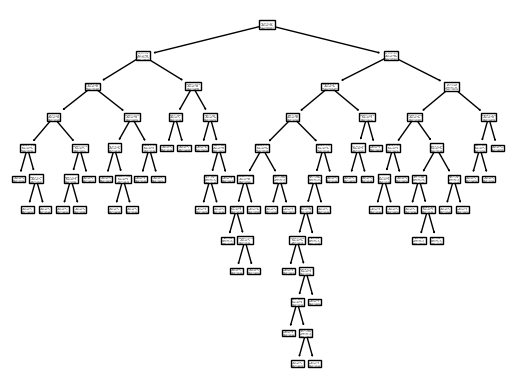

In [37]:
fig, ax = plt.subplots()
plot_tree(clf,
          ax=ax,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns
          )
plt.show()

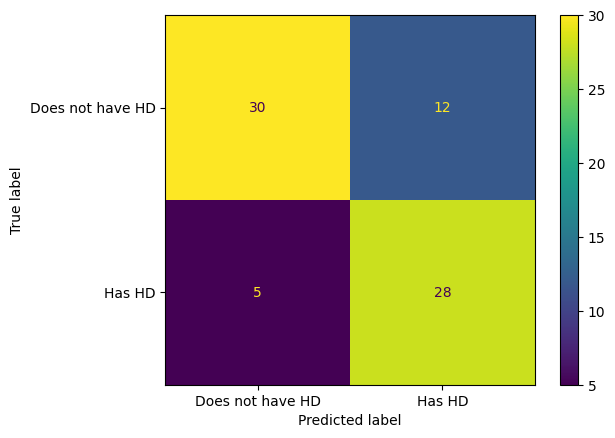

In [42]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Does not have HD", "Has HD"]
    )
disp.plot()
plt.show()

### Optimal Search
Let's fight against overfitting and huge trees.
#### Cost complexity pruning
Weakest link pruning. 
1. Sum of the squared residuals (SSR), this number increases every time we prune a tree (deleting one subtree)
$$\text{Tree Score} = \mathcal{SSR} + \alpha T$$
where $\alpha T$ is the tree complexity penalty ($T$ total number of leaves). We'll pick the tree with the best score. How do we pick the best value for $\alpha$?

In [47]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
        0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06655097, 0.07255697, 0.09057499, 0.102587  ,
        0.11459901, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [48]:
# exclude the maximum value of alpah (just one node (root) tree)
ccp_alphas = path.ccp_alphas[:-1]

clf_alphas = []

for alpha in ccp_alphas:
    clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf_alpha.fit(X_train, y_train)
    clf_alphas.append(clf_alpha)

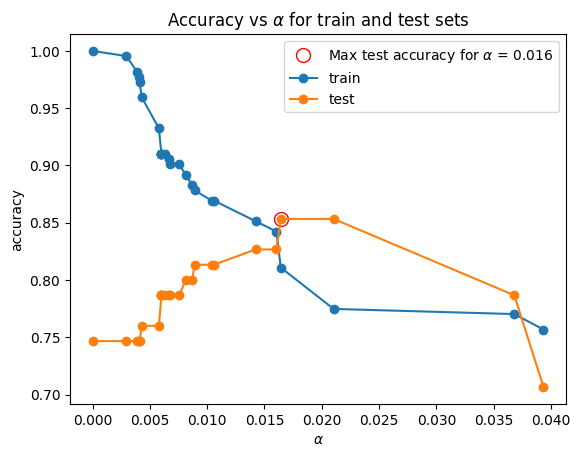

In [64]:
train_scores = [tree.score(X_train, y_train) for tree in clf_alphas]
test_scores = [tree.score(X_test, y_test) for tree in clf_alphas]

fig, ax = plt.subplots()
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("accuracy")
ax.set_title(r"Accuracy vs $\alpha$ for train and test sets")

ax.plot(
    ccp_alphas[np.argmax(test_scores)],
    np.max(test_scores),
    "ro",
    markersize=10,
    mfc="w",
    label=r"Max test accuracy for $\alpha$" + f" = {ccp_alphas[np.argmax(test_scores)]:.3f}"
    )
ax.plot(ccp_alphas, train_scores, "o-", label="train")
ax.plot(ccp_alphas, test_scores, "o-", label="test")


ax.legend()
plt.show()

### 10-fold cross validation to find $\alpha$
Avoid overfitting to one split in particular

In [66]:
alpha_loops_values = []

for alpha in ccp_alphas:
    clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(clf_alpha, X_train, y_train, cv=5)
    alpha_loops_values.append([alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loops_values, columns=["alpha", "mean_accuracy", "std"])
alpha_results.head()

,alpha,mean_accuracy,std
0,0.00e+00,0.69,0.07
1,2.95e-03,0.69,0.07
2,3.86e-03,0.70,0.08
3,4.05e-03,0.70,0.08
4,4.10e-03,0.70,0.08


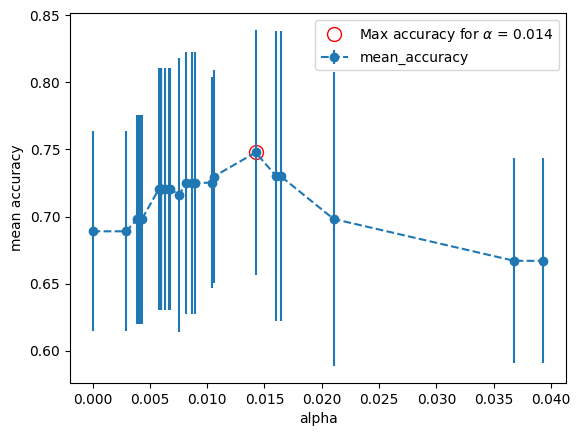

In [96]:
fig, ax = plt.subplots()
ax.set_ylabel("mean accuracy")
ax.plot(
    ccp_alphas[np.argmax(alpha_results["mean_accuracy"])],
    np.max(alpha_results["mean_accuracy"]),
    "ro",
    markersize=10,
    mfc="w",
    label=r"Max accuracy for $\alpha$" + f" = {ccp_alphas[np.argmax(alpha_results['mean_accuracy'])]:.3f}"
    )
alpha_results.plot(ax=ax, x="alpha", y="mean_accuracy", yerr="std", marker="o", linestyle="--")
ax.legend()
plt.show()

In [102]:
ideal_ccp_alpha = ccp_alphas[np.argmax(alpha_results['mean_accuracy'])]

### Final classification tree

In [103]:
clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

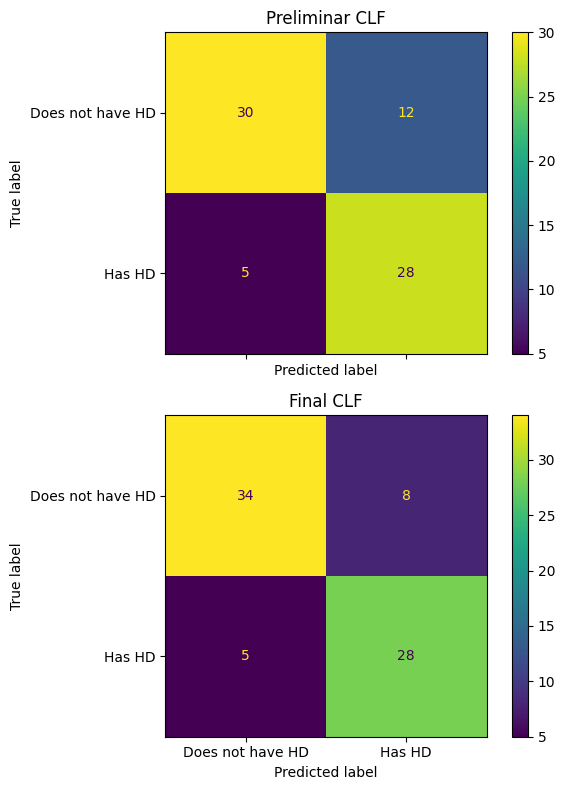

In [113]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
ax1.set_title("Preliminar CLF")
disp.plot(ax=ax1)

ax2.set_title("Final CLF")
predictions = clf_final.predict(X_test)
cm_final = confusion_matrix(y_test, predictions)
disp_final = ConfusionMatrixDisplay(
    confusion_matrix=cm_final,
    display_labels=["Does not have HD", "Has HD"]
    )
disp_final.plot(ax=ax2)

plt.tight_layout()
plt.show()

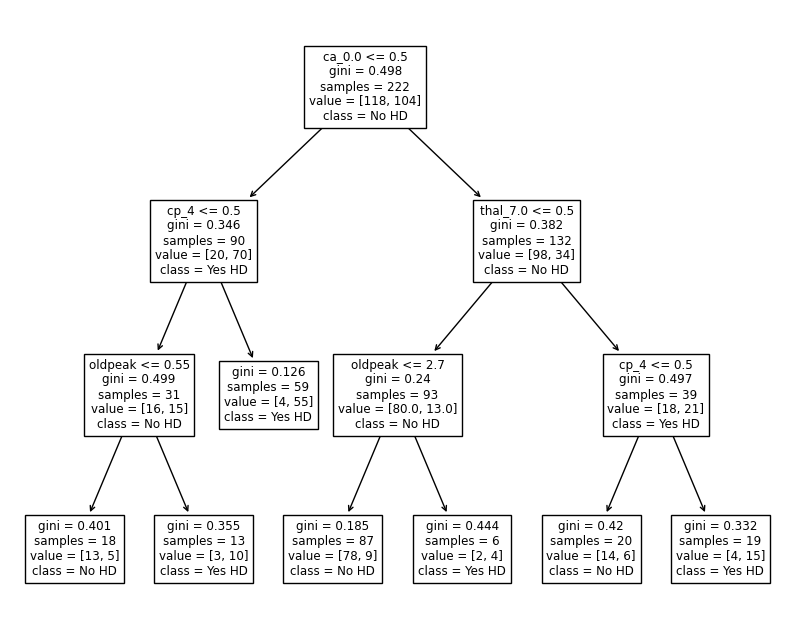

In [115]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_tree(clf_final,
          ax=ax,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns
          )
plt.show()